### Getting the data

##### Please look at the information in the `get_data.ipynb` notebook. You have to end up with `swift.dkrz.de` folder located somwere in your system. All data used in this examples are located in this folder.  

In [1]:
import sys
sys.path.append("../")

import pyfesom as pf
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
#%matplotlib notebook
%matplotlib inline
from matplotlib import cm
from netCDF4 import Dataset, MFDataset

First, as usuall load the mesh:

In [2]:
meshpath  ='../../swift.dkrz.de/COREII'
mesh = pf.load_mesh(meshpath, usepickle=True)

/scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/users/nkolduno/swift.dkrz.de/COREII/pickle_mesh


Load data for one year:

In [4]:
fl = Dataset('../../swift.dkrz.de/COREII_data/fesom.1951.oce.mean.nc')

In [5]:
fl.variables['temp'].shape

(12, 3668773)

Make a mean over all timesteps:

In [6]:
%%time
temp_mean = fl.variables['temp'][:,:].mean(axis=0)

CPU times: user 440 ms, sys: 124 ms, total: 564 ms
Wall time: 1.08 s


And plot the data

In [7]:
m = Basemap(projection='robin',lon_0=0, resolution='c')
x, y = m(mesh.x2, mesh.y2)

For depth 100 model level 100.0 will be used
CPU times: user 712 ms, sys: 232 ms, total: 944 ms
Wall time: 679 ms


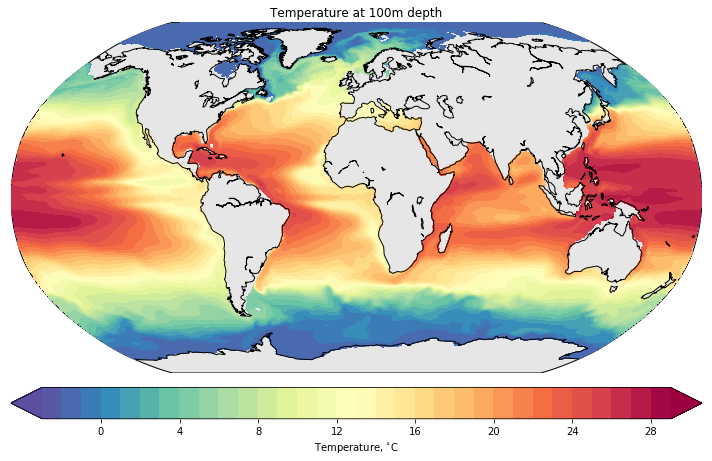

In [8]:
%%time
level_data, elem_no_nan = pf.get_data(temp_mean,mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(-3., 30., 1)
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                cmap=cm.Spectral_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

Do STD instead of mean

In [9]:
%%time
temp_std = fl.variables['temp'][:,:].std(axis=0)

CPU times: user 224 ms, sys: 392 ms, total: 616 ms
Wall time: 626 ms


For depth 100 model level 100.0 will be used


/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in less_equal
/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in greater_equal


CPU times: user 464 ms, sys: 192 ms, total: 656 ms
Wall time: 445 ms


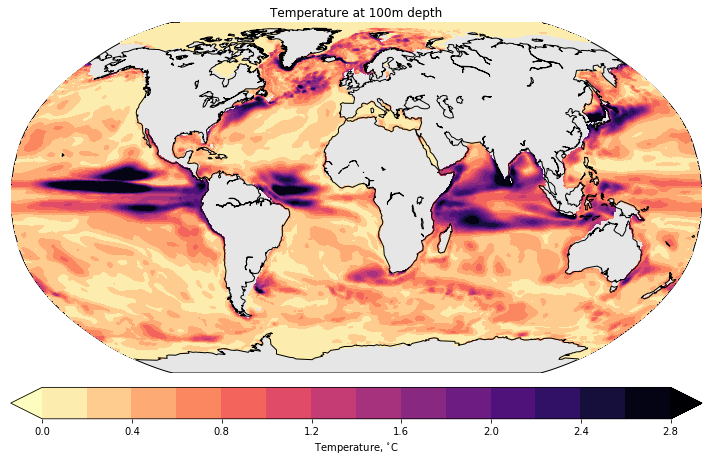

In [11]:
%%time
level_data, elem_no_nan = pf.get_data(temp_std,mesh,100)

plt.figure(figsize=(10,7))
m.drawmapboundary(fill_color='0.9')
m.drawcoastlines()

levels = np.arange(0, 3., 0.2)
eps=(levels.max()-levels.min())/50.
level_data[level_data<=levels.min()]=levels.min()+eps
level_data[level_data>=levels.max()]=levels.max()-eps
plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                cmap=cm.magma_r, extend='both')
cbar = plt.colorbar(orientation='horizontal', pad=0.03);
cbar.set_label("Temperature, $^{\circ}$C")
plt.title('Temperature at 100m depth')
plt.tight_layout()

Or make an interactive plotting interface:

In [12]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [15]:
def sp(mon=0, depth = 100):
    level_data, elem_no_nan = pf.get_data(fl.variables['temp'][mon-1,:]-temp_mean,\
                                          mesh, depth)

    plt.figure(figsize=(10,7))
    m.drawmapboundary(fill_color='0.9')
    m.drawcoastlines()

    levels = np.arange(-2, 2., 0.2)
    eps=(levels.max()-levels.min())/50.
    level_data[level_data<=levels.min()]=levels.min()+eps
    level_data[level_data>=levels.max()]=levels.max()-eps
    plt.tricontourf(x, y, elem_no_nan[::], level_data, levels = levels, \
                    cmap=cm.coolwarm, extend='both')
    cbar = plt.colorbar(orientation='horizontal', pad=0.03);
    cbar.set_label("Temperature, $^{\circ}$C")
    plt.title('Temperature at {}m depth, month {}'.format(str(depth),str(mon)))
    plt.tight_layout()

For depth 100 model level 100.0 will be used


/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in less_equal
/scratch/users/nkolduno/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in greater_equal


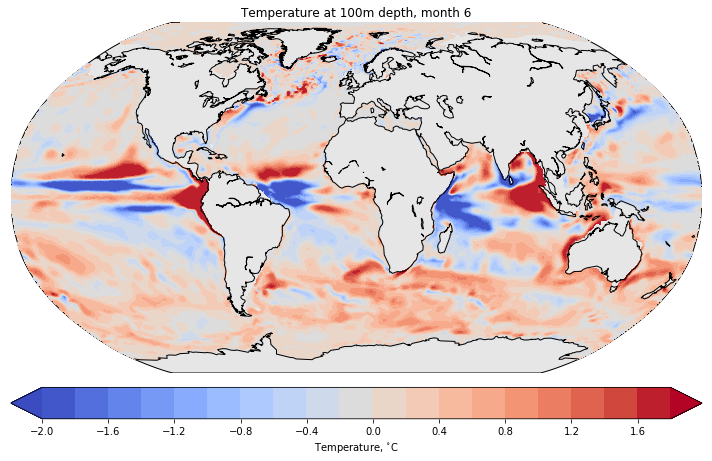

In [16]:
interact(sp, mon =(1,24), depth = (0,5000,100));